In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.helper_functions import load_data
from helpers.visualisers import heat_map

In [2]:
df, _ = load_data('data')

In [3]:
df.head()

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3  -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

    f_07  f_08  f_09  ...      f_22      f_23      f_24      f_25      f_26  \
id                    ...                                                     
0      1     5     1  ... -2.540739  0.766952 -2.730628 -0.208177  1.363402   
1      1     3     4  ...  2.278315 -0.633658 -1.217077 -3.782194 -0.058316   
2      1     0     2  ... -1.385775 -0.520558 -0.009121  2.788536 -3.703488   
3      3     2     1  ...  0.572594 -1.653213  1.686035 -2.533098 -0.608601   
4      3     3     0  ... -3.912929 -1.430366  2.127649 -3.306784  4.371371   

          f_27        f_28  f_29  f_30  target  
id                                              
0   ABABDADBAB   67.609153     0     0       0  
1   ACACCADCEB  377.096415     0     0       1  
2   AAAEABCKAD -195.599702     0     2       1  
3   BDBBAACBCB  210.826205     0     0       1  
4   BDBCBBCHFE -217.211798     0     1       1  

[5 rows x 32 columns]

In [4]:
df.dtypes

f_00      float64
f_01      float64
f_02      float64
f_03      float64
f_04      float64
f_05      float64
f_06      float64
f_07        int64
f_08        int64
f_09        int64
f_10        int64
f_11        int64
f_12        int64
f_13        int64
f_14        int64
f_15        int64
f_16        int64
f_17        int64
f_18        int64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23      float64
f_24      float64
f_25      float64
f_26      float64
f_27       object
f_28      float64
f_29        int64
f_30        int64
target      int64
dtype: object

In [26]:
df_numeric = df.select_dtypes(exclude=['object'])
df_X_numeric = df_numeric.drop(columns=["target"])
df_X_float = df_X_numeric.select_dtypes(exclude=['int64'])
df_X_int = df_X_numeric.select_dtypes(exclude=['float64'])
df_X = df.drop(columns=["target"])

In [29]:
from itertools import combinations
float_cols = df_X_float.columns
len(list(combinations(float_cols, 2)))

120

In [32]:
corr_df = df_X_int.corr()
corr_df

f_07      f_08      f_09      f_10      f_11      f_12      f_13  \
f_07  1.000000  0.112707  0.006641 -0.088858 -0.135343  0.094462  0.059826   
f_08  0.112707  1.000000 -0.066704 -0.085745 -0.103141  0.011905  0.039174   
f_09  0.006641 -0.066704  1.000000 -0.050843  0.007326  0.034887 -0.046502   
f_10 -0.088858 -0.085745 -0.050843  1.000000  0.149116 -0.034627  0.032506   
f_11 -0.135343 -0.103141  0.007326  0.149116  1.000000 -0.023452 -0.008011   
f_12  0.094462  0.011905  0.034887 -0.034627 -0.023452  1.000000  0.014714   
f_13  0.059826  0.039174 -0.046502  0.032506 -0.008011  0.014714  1.000000   
f_14 -0.061397 -0.043501  0.031229  0.008692  0.054917 -0.007783 -0.011181   
f_15  0.055947  0.010702  0.000228 -0.007512 -0.054071 -0.014189  0.037430   
f_16  0.062147  0.049713 -0.020037 -0.043746 -0.088518 -0.011415 -0.011337   
f_17 -0.149931 -0.050146  0.005336  0.013046  0.078238 -0.038874 -0.036889   
f_18  0.026984  0.065304 -0.051309  0.065826  0.080507 -0.005899  0.039744   
f_29 -0.048163  0.064927 -0.104325  0.120084  0.078339 -0.111808  0.006938   
f_30  0.000169  0.000336 -0.001391 -0.002176 -0.002813 -0.002394 -0.001112   

          f_14      f_15      f_16      f_17      f_18      f_29      f_30  
f_07 -0.061397  0.055947  0.062147 -0.149931  0.026984 -0.048163  0.000169  
f_08 -0.043501  0.010702  0.049713 -0.050146  0.065304  0.064927  0.000336  
f_09  0.031229  0.000228 -0.020037  0.005336 -0.051309 -0.104325 -0.001391  
f_10  0.008692 -0.007512 -0.043746  0.013046  0.065826  0.120084 -0.002176  
f_11  0.054917 -0.054071 -0.088518  0.078238  0.080507  0.078339 -0.002813  
f_12 -0.007783 -0.014189 -0.011415 -0.038874 -0.005899 -0.111808 -0.002394  
f_13 -0.011181  0.037430 -0.011337 -0.036889  0.039744  0.006938 -0.001112  
f_14  1.000000  0.027159 -0.096812  0.053382 -0.036017 -0.037073 -0.000661  
f_15  0.027159  1.000000 -0.031675 -0.034475 -0.014370 -0.000037  0.002159  
f_16 -0.096812 -0.031675  1.000000 -0.082978 -0.003553  0.090994 -0.000222  
f_17  0.053382 -0.034475 -0.082978  1.000000 -0.022901 -0.077675  0.001482  
f_18 -0.036017 -0.014370 -0.003553 -0.022901  1.000000  0.157416 -0.000146  
f_29 -0.037073 -0.000037  0.090994 -0.077675  0.157416  1.000000 -0.000028  
f_30 -0.000661  0.002159 -0.000222  0.001482 -0.000146 -0.000028  1.000000

In [ ]:
flat_df = all_corr_df.stack()
correlated_pairs= flat_df[(flat_df > 0.05) | (flat_df < -0.05)].index 

In [38]:
thresh_0.5corr_df[corr_df > 0.05]

f_07      f_08  f_09      f_10      f_11      f_12      f_13  \
f_07  1.000000  0.112707   NaN       NaN       NaN  0.094462  0.059826   
f_08  0.112707  1.000000   NaN       NaN       NaN       NaN       NaN   
f_09       NaN       NaN   1.0       NaN       NaN       NaN       NaN   
f_10       NaN       NaN   NaN  1.000000  0.149116       NaN       NaN   
f_11       NaN       NaN   NaN  0.149116  1.000000       NaN       NaN   
f_12  0.094462       NaN   NaN       NaN       NaN  1.000000       NaN   
f_13  0.059826       NaN   NaN       NaN       NaN       NaN  1.000000   
f_14       NaN       NaN   NaN       NaN  0.054917       NaN       NaN   
f_15  0.055947       NaN   NaN       NaN       NaN       NaN       NaN   
f_16  0.062147       NaN   NaN       NaN       NaN       NaN       NaN   
f_17       NaN       NaN   NaN       NaN  0.078238       NaN       NaN   
f_18       NaN  0.065304   NaN  0.065826  0.080507       NaN       NaN   
f_29       NaN  0.064927   NaN  0.120084  0.078339       NaN       NaN   
f_30       NaN       NaN   NaN       NaN       NaN       NaN       NaN   

          f_14      f_15      f_16      f_17      f_18      f_29  f_30  
f_07       NaN  0.055947  0.062147       NaN       NaN       NaN   NaN  
f_08       NaN       NaN       NaN       NaN  0.065304  0.064927   NaN  
f_09       NaN       NaN       NaN       NaN       NaN       NaN   NaN  
f_10       NaN       NaN       NaN       NaN  0.065826  0.120084   NaN  
f_11  0.054917       NaN       NaN  0.078238  0.080507  0.078339   NaN  
f_12       NaN       NaN       NaN       NaN       NaN       NaN   NaN  
f_13       NaN       NaN       NaN       NaN       NaN       NaN   NaN  
f_14  1.000000       NaN       NaN  0.053382       NaN       NaN   NaN  
f_15       NaN  1.000000       NaN       NaN       NaN       NaN   NaN  
f_16       NaN       NaN  1.000000       NaN       NaN  0.090994   NaN  
f_17  0.053382       NaN       NaN  1.000000       NaN       NaN   NaN  
f_18       NaN       NaN       NaN       NaN  1.000000  0.157416   NaN  
f_29       NaN       NaN  0.090994       NaN  0.157416  1.000000   NaN  
f_30       NaN       NaN       NaN       NaN       NaN       NaN   1.0

In [ ]:
def correlation_filter(corr_df, threshhold):
    """
    Returns list of tuples for feature pairs with absolute correlation values greater than the threshhold
    """
    

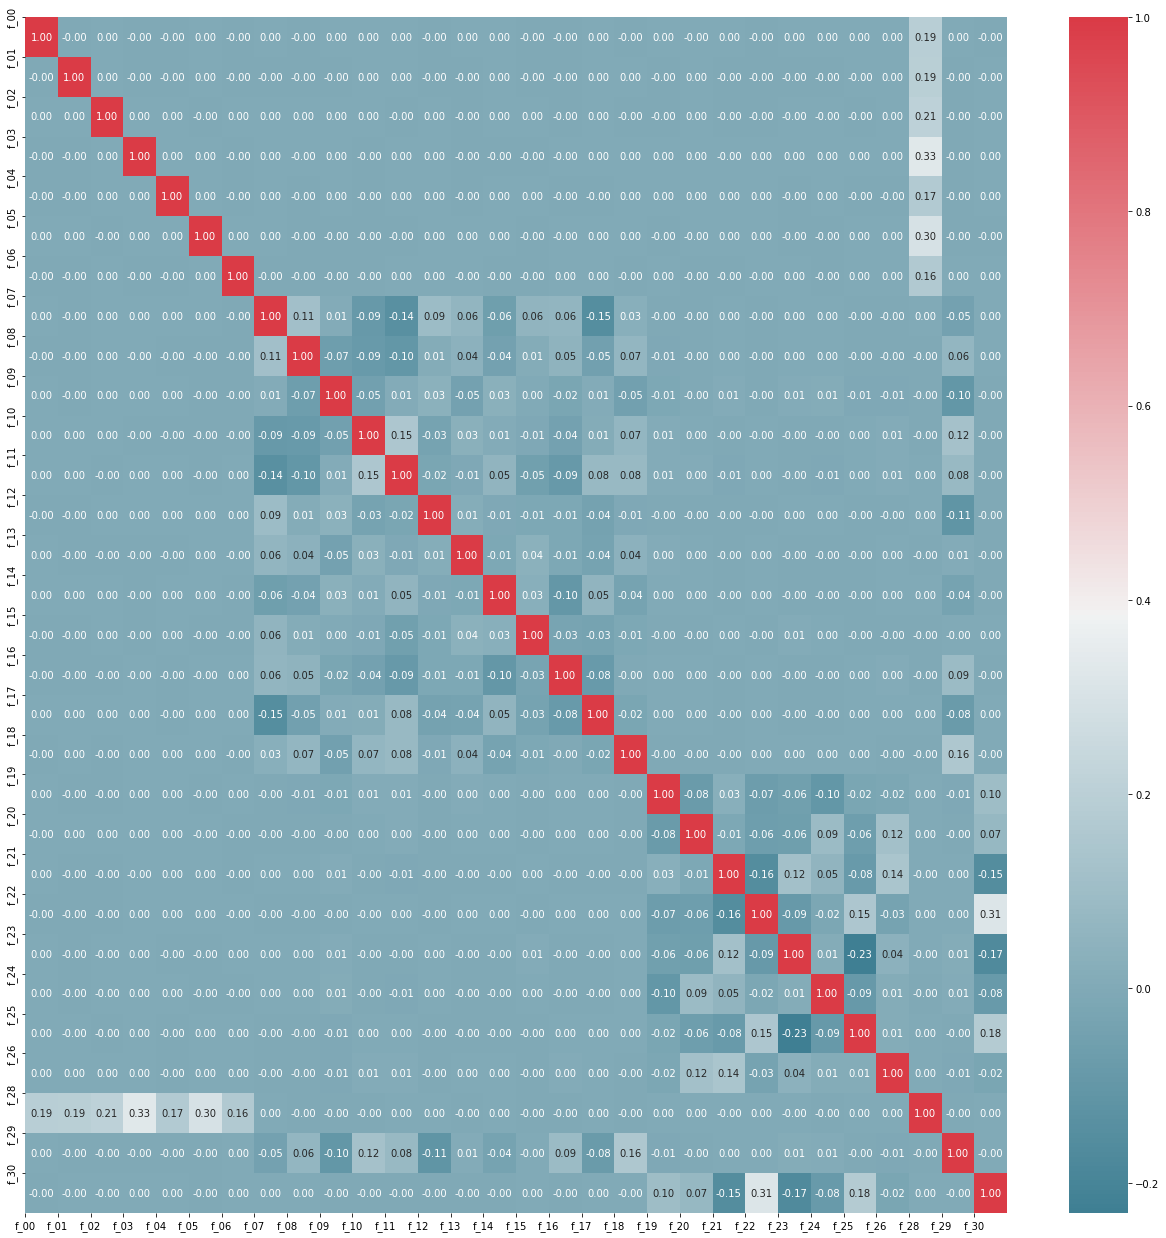

In [9]:
# correlation heatmap for all numeric features
heat_map(df_X_numeric, (22, 22))

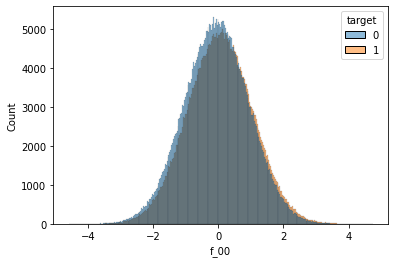

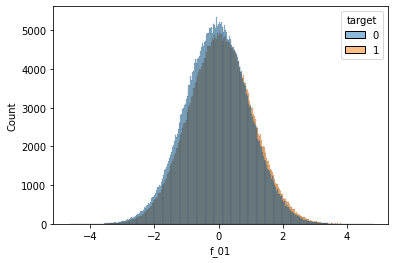

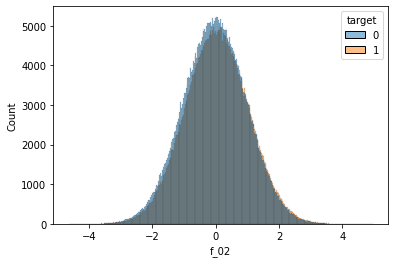

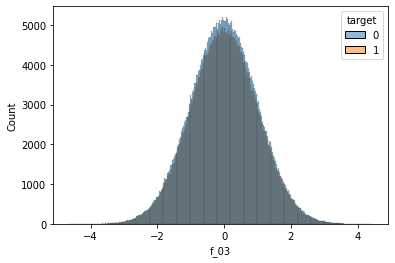

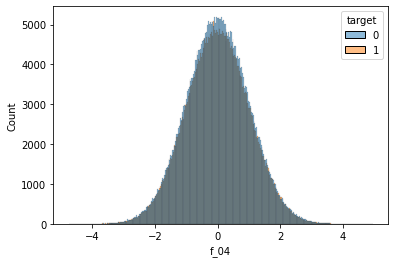

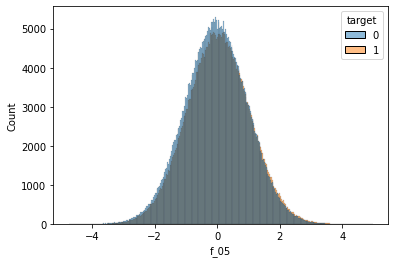

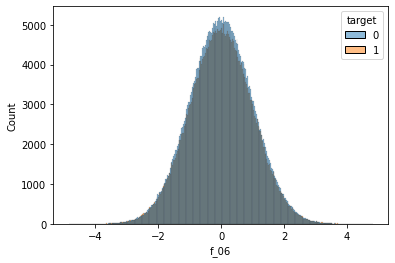

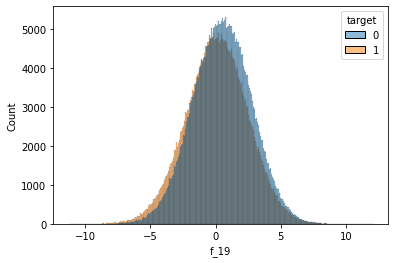

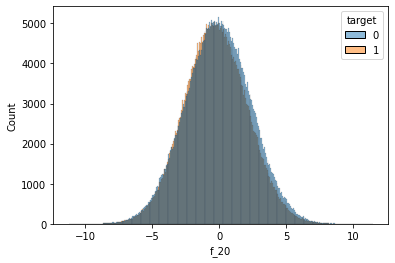

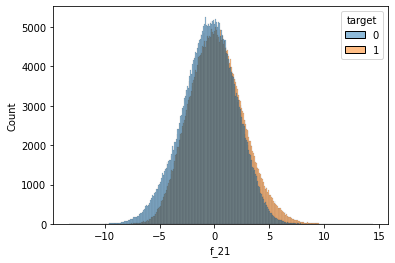

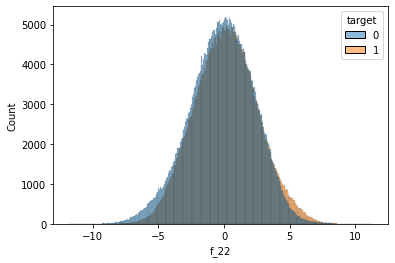

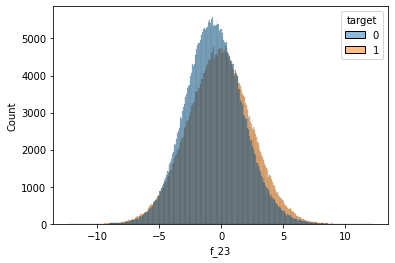

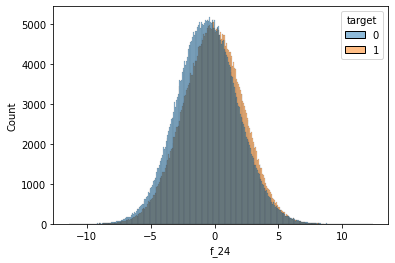

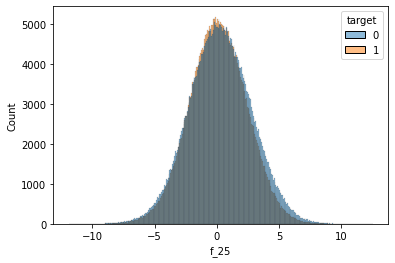

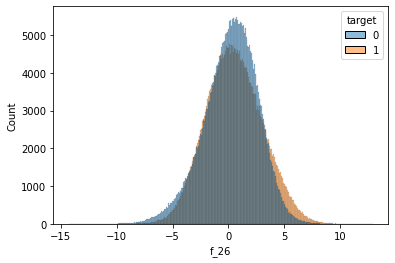

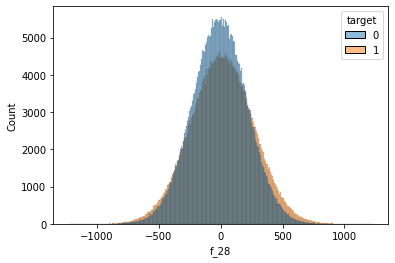

In [10]:
# histograms for all numeric features
for col in df_X_float:
    sns.histplot(data=df_numeric, x=col, hue="target")
    plt.show()

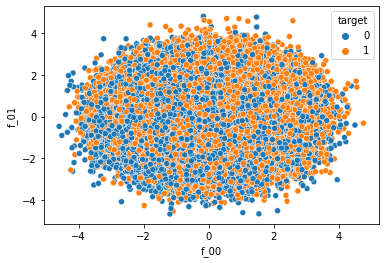

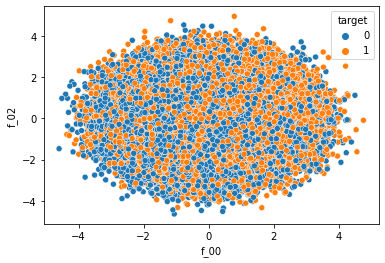

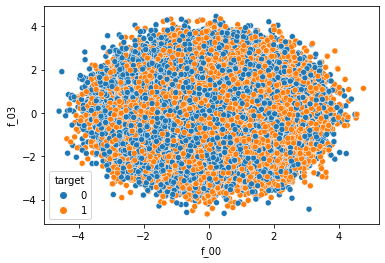

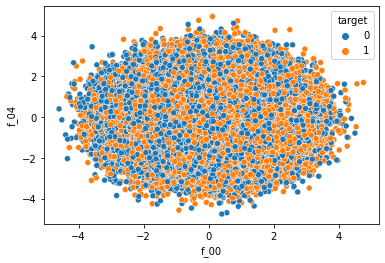

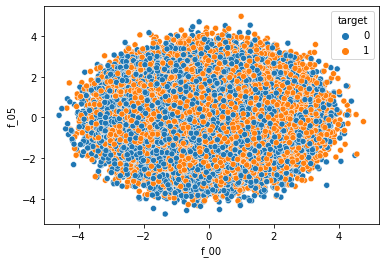

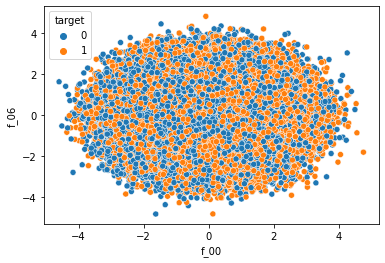

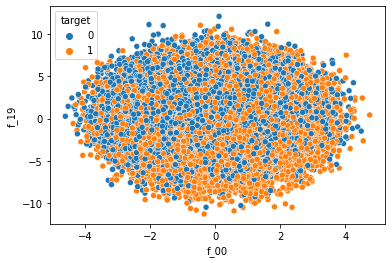

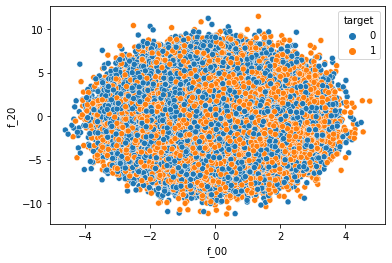

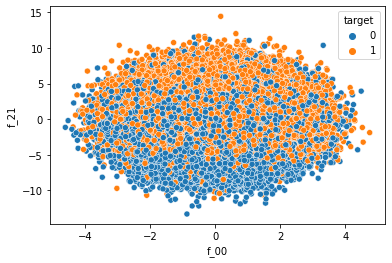

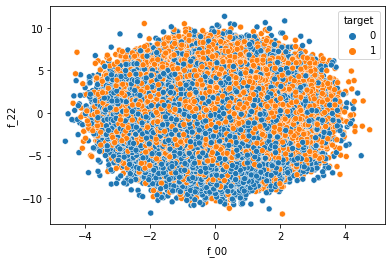

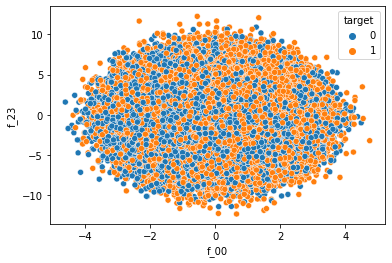

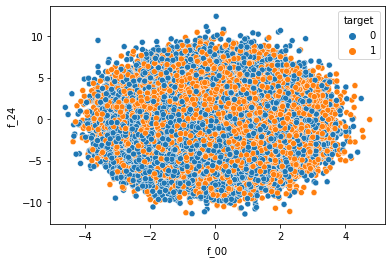

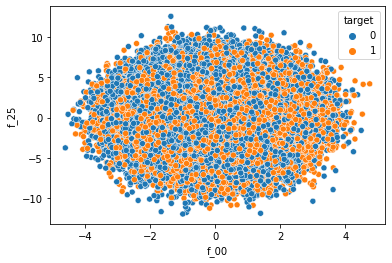

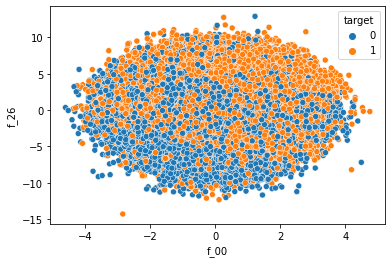

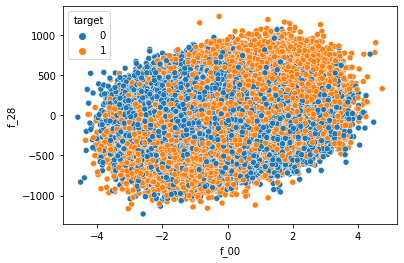

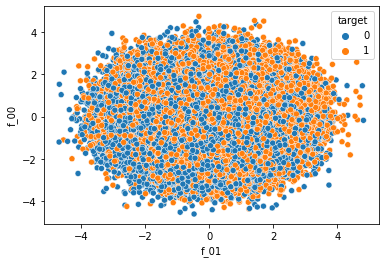

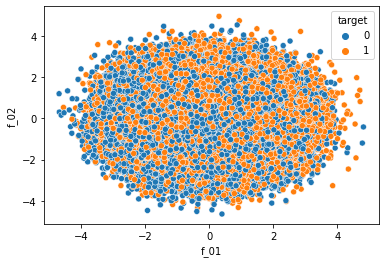

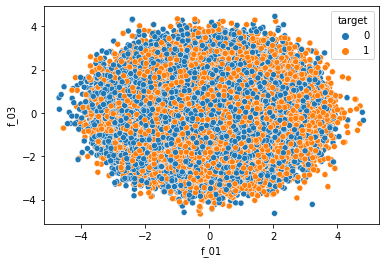

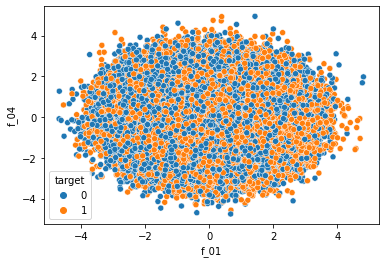

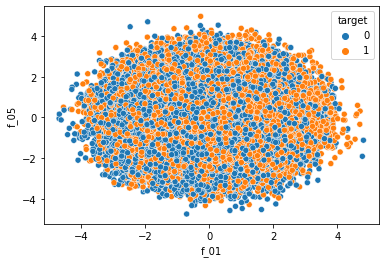

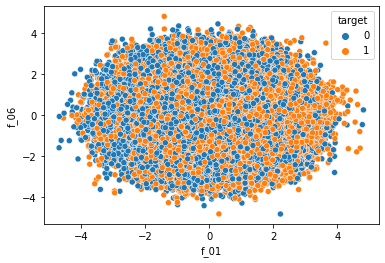

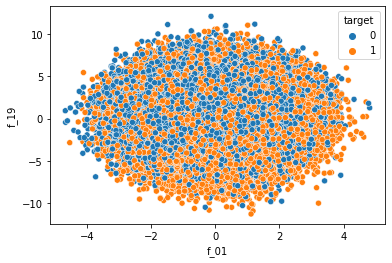

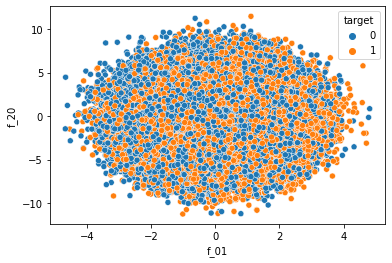

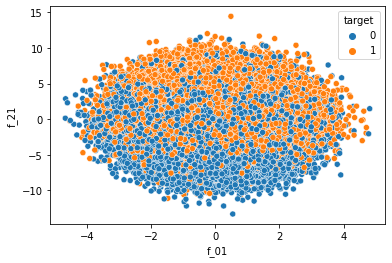

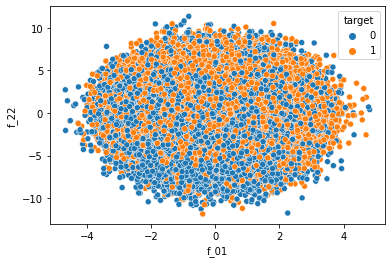

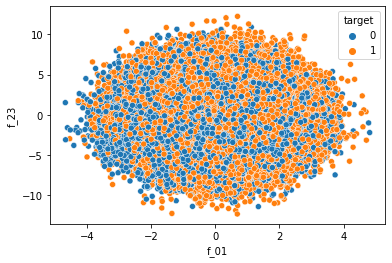

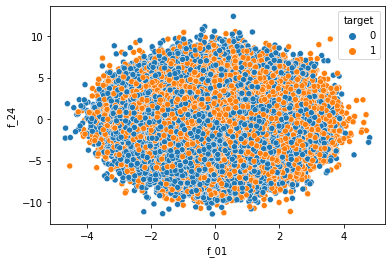

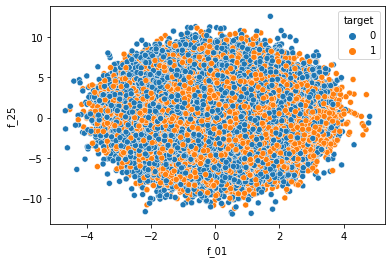

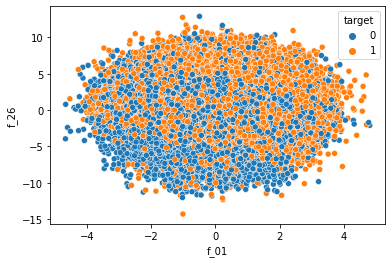

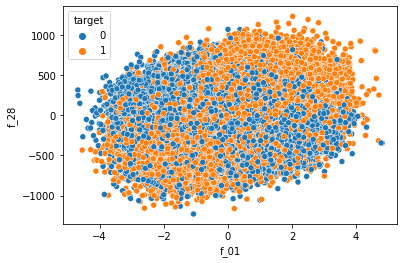

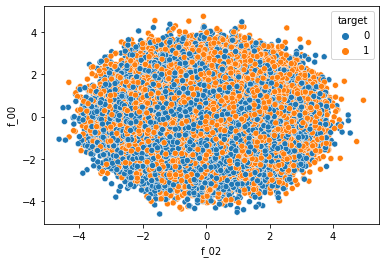

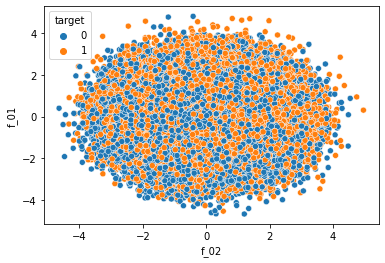

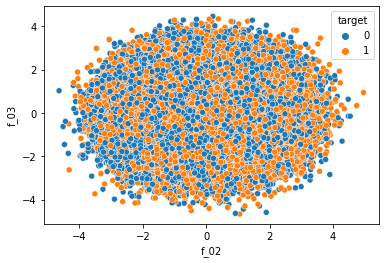

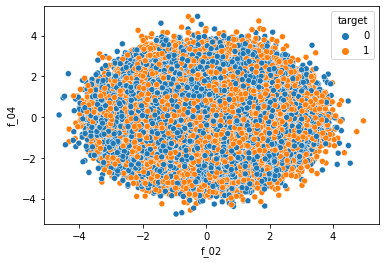

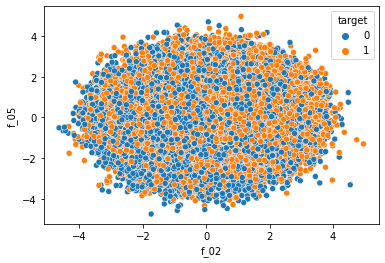

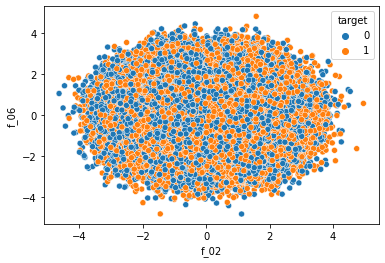

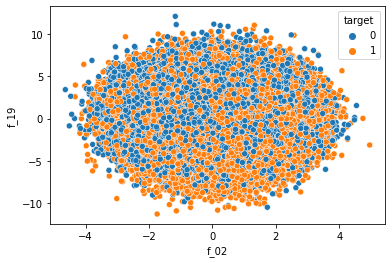

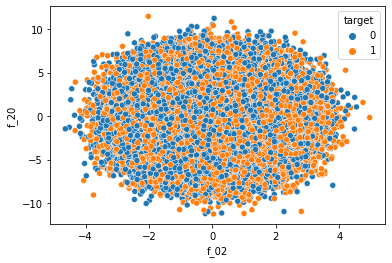

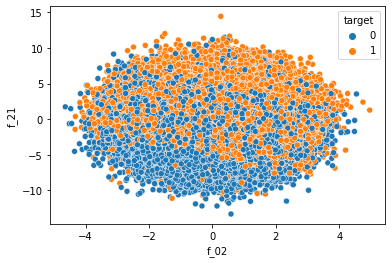

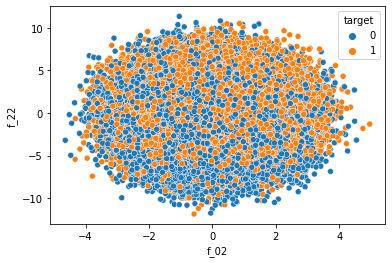

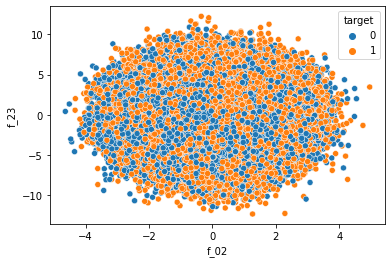

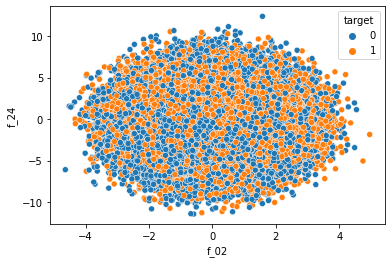

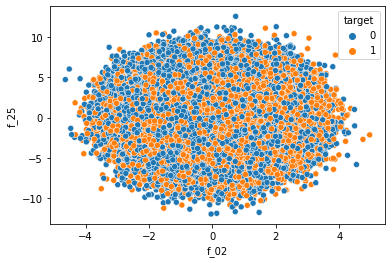

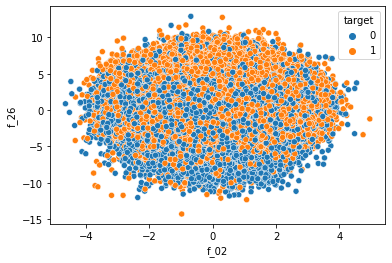

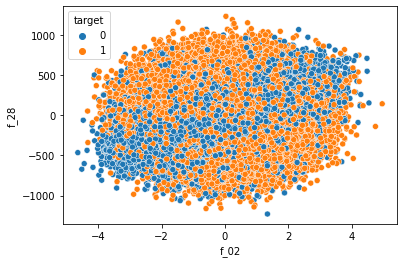

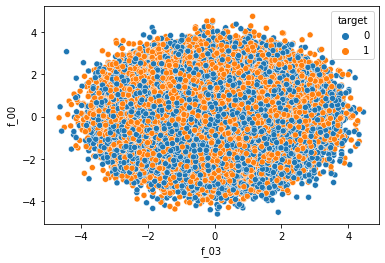

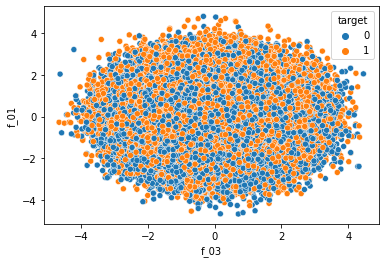

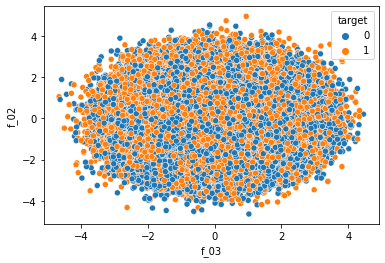

/home/agb/projects/kaggle/kaggle_tabular_playground_2022_05/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


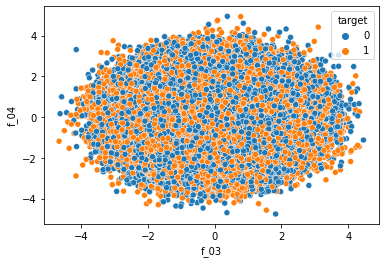

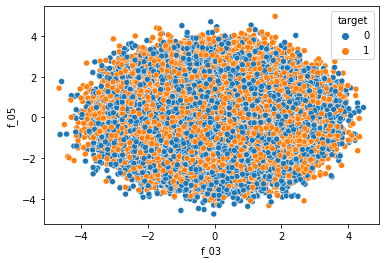

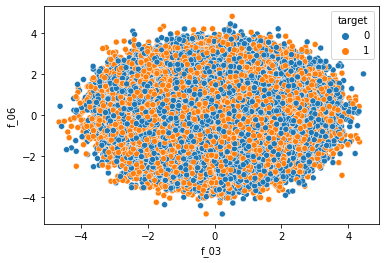

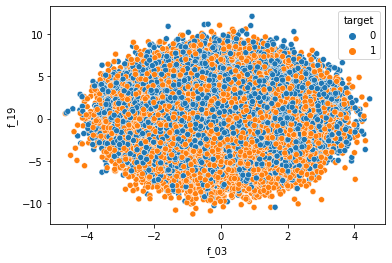

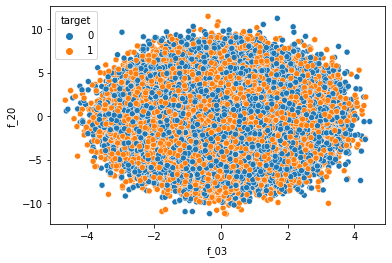

KeyboardInterrupt: 

In [11]:
for col_a in df_X_float:
    for col_b in df_X_float:
        if col_a != col_b:
            sns.scatterplot(data=df_numeric, x=col_a, y=col_b, hue="target")
            plt.show()

120